# Input packages and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn

from sklearn import svm
from sklearn import neighbors, datasets, model_selection, metrics
from sklearn.svm import SVC, NuSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

In [2]:
data = pd.read_csv('busiest_airline_delays.csv')

# Preprocessing

In [3]:
data.head()

MONTH  DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP      DEP_BLOCK  \
0      1            3          0               5        MORNING   
1      1            3          0               3        MORNING   
2      1            3          0               9        MORNING   
3      1            3          0               1  EARLY_MORNING   
4      1            3          0               2        MORNING   

   SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
0               1                 229              142   
1               1                 229              120   
2               1                 229              142   
3               1                   4              128   
4               1                 229               50   

             CARRIER_NAME  AIRPORT_FLIGHTS_MONTH  ...  PLANE_AGE  \
0   United Air Lines Inc.                  32102  ...         19   
1   United Air Lines Inc.                  32102  ...         22   
2   United Air Lines Inc.                  32102  ...         24   
3  American Airlines Inc.                  32102  ...         20   
4   SkyWest Airlines Inc.                  32102  ...         21   

   DEPARTING_AIRPORT  LATITUDE  LONGITUDE  PREVIOUS_AIRPORT  PRCP  SNOW SNWD  \
0  Atlanta Municipal    33.641    -84.427              NONE   0.0   0.0  0.0   
1  Atlanta Municipal    33.641    -84.427              NONE   0.0   0.0  0.0   
2  Atlanta Municipal    33.641    -84.427              NONE   0.0   0.0  0.0   
3  Atlanta Municipal    33.641    -84.427              NONE   0.0   0.0  0.0   
4  Atlanta Municipal    33.641    -84.427              NONE   0.0   0.0  0.0   

   TMAX  AWND  
0  72.0  4.47  
1  72.0  4.47  
2  72.0  4.47  
3  72.0  4.47  
4  72.0  4.47  

[5 rows x 26 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120894 entries, 0 to 120893
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   MONTH                          120894 non-null  int64  
 1   DAY_OF_WEEK                    120894 non-null  int64  
 2   DEP_DEL15                      120894 non-null  int64  
 3   DISTANCE_GROUP                 120894 non-null  int64  
 4   DEP_BLOCK                      120894 non-null  object 
 5   SEGMENT_NUMBER                 120894 non-null  int64  
 6   CONCURRENT_FLIGHTS             120894 non-null  int64  
 7   NUMBER_OF_SEATS                120894 non-null  int64  
 8   CARRIER_NAME                   120894 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH          120894 non-null  int64  
 10  AIRLINE_FLIGHTS_MONTH          120894 non-null  int64  
 11  AIRLINE_AIRPORT_FLIGHTS_MONTH  120894 non-null  int64  
 12  AVG_MONTHLY_PASS_AIRPORT      

In [5]:
data.describe()

MONTH    DAY_OF_WEEK      DEP_DEL15  DISTANCE_GROUP  SEGMENT_NUMBER  \
count  120894.0  120894.000000  120894.000000   120894.000000   120894.000000   
mean        1.0       3.942677       0.149710        3.353525        3.211152   
std         0.0       1.910102       0.356788        1.855241        1.718627   
min         1.0       1.000000       0.000000        1.000000        1.000000   
25%         1.0       2.000000       0.000000        2.000000        2.000000   
50%         1.0       4.000000       0.000000        3.000000        3.000000   
75%         1.0       5.000000       0.000000        4.000000        4.000000   
max         1.0       7.000000       1.000000       11.000000       11.000000   

       CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  \
count       120894.000000    120894.000000          120894.000000   
mean           177.968783       127.222674           24984.998114   
std             52.524855        50.946997            4667.824038   
min              1.000000        44.000000           19902.000000   
25%            156.000000        76.000000           20193.000000   
50%            182.000000       142.000000           23873.000000   
75%            213.000000       172.000000           32102.000000   
max            286.000000       337.000000           32102.000000   

       AIRLINE_FLIGHTS_MONTH  AIRLINE_AIRPORT_FLIGHTS_MONTH  ...  \
count          120894.000000                  120894.000000  ...   
mean            58978.630974                    7537.814565  ...   
std             27722.923436                    6050.361247  ...   
min              7688.000000                       1.000000  ...   
25%             25366.000000                    3787.000000  ...   
50%             69699.000000                    5347.000000  ...   
75%             80026.000000                   11786.000000  ...   
max            107849.000000                   19461.000000  ...   

       FLT_ATTENDANTS_PER_PASS  GROUND_SERV_PER_PASS      PLANE_AGE  \
count            120894.000000         120894.000000  120894.000000   
mean                  0.000612              0.000723      11.730557   
std                   0.000532              0.000263       7.522912   
min                   0.000000              0.000033       0.000000   
25%                   0.000170              0.000492       4.000000   
50%                   0.000504              0.000792      13.000000   
75%                   0.000768              0.000911      18.000000   
max                   0.001759              0.001265      32.000000   

            LATITUDE      LONGITUDE           PRCP           SNOW  \
count  120894.000000  120894.000000  120894.000000  120894.000000   
mean       36.489558     -90.471664       0.126495       0.042920   
std         3.600088       8.318211       0.307733       0.262952   
min        32.894000    -104.880000       0.000000       0.000000   
25%        33.641000     -97.030000       0.000000       0.000000   
50%        35.219000     -87.906000       0.000000       0.000000   
75%        39.774000     -84.427000       0.020000       0.000000   
max        41.978000     -80.936000       1.910000       3.100000   

                SNWD           TMAX           AWND  
count  120894.000000  120894.000000  120894.000000  
mean        0.144341      51.493838       8.819766  
std         0.486133      11.645643       3.449294  
min         0.000000      19.000000       2.680000  
25%         0.000000      42.000000       6.040000  
50%         0.000000      53.000000       8.050000  
75%         0.000000      60.000000      11.180000  
max         2.000000      79.000000      25.050000  

[8 rows x 22 columns]

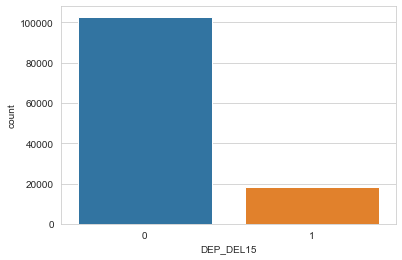

In [6]:
sns.set_style('whitegrid')
sns.countplot(x=data['DEP_DEL15'],data=data)
plt.show()

## Data Cleaning

In [7]:
data = data.drop_duplicates()
data = data.drop(columns=['MONTH','LATITUDE','LONGITUDE'])
data.head()

DAY_OF_WEEK  DEP_DEL15  DISTANCE_GROUP      DEP_BLOCK  SEGMENT_NUMBER  \
0            3          0               5        MORNING               1   
1            3          0               3        MORNING               1   
2            3          0               9        MORNING               1   
3            3          0               1  EARLY_MORNING               1   
4            3          0               2        MORNING               1   

   CONCURRENT_FLIGHTS  NUMBER_OF_SEATS            CARRIER_NAME  \
0                 229              142   United Air Lines Inc.   
1                 229              120   United Air Lines Inc.   
2                 229              142   United Air Lines Inc.   
3                   4              128  American Airlines Inc.   
4                 229               50   SkyWest Airlines Inc.   

   AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  ...  FLT_ATTENDANTS_PER_PASS  \
0                  32102                  48104  ...                 0.001402   
1                  32102                  48104  ...                 0.001402   
2                  32102                  48104  ...                 0.001402   
3                  32102                  75591  ...                 0.000504   
4                  32102                  69699  ...                 0.000170   

   GROUND_SERV_PER_PASS  PLANE_AGE  DEPARTING_AIRPORT  PREVIOUS_AIRPORT  PRCP  \
0              0.001265         19  Atlanta Municipal              NONE   0.0   
1              0.001265         22  Atlanta Municipal              NONE   0.0   
2              0.001265         24  Atlanta Municipal              NONE   0.0   
3              0.000911         20  Atlanta Municipal              NONE   0.0   
4              0.000492         21  Atlanta Municipal              NONE   0.0   

  SNOW SNWD  TMAX  AWND  
0  0.0  0.0  72.0  4.47  
1  0.0  0.0  72.0  4.47  
2  0.0  0.0  72.0  4.47  
3  0.0  0.0  72.0  4.47  
4  0.0  0.0  72.0  4.47  

[5 rows x 23 columns]